### Import the needed Libraries

In [261]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

### Import the dataset and take a first look

In [262]:
listings = pd.read_csv('data/listings.csv')

In [263]:
listings.shape

(9404, 96)

In [264]:
listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

As this dataset includes a large number of columns, and most of them not really useful, we can select the columns we have interest on.

Columns such as 'id', 'name' and 'listing_url' won't probably hold any value for future data representation and modelling, but might help in the cleaning process. So they are imported to the dataset for now, but most will be removed later on.

In [265]:
columns = ['id', 'name', 'listing_url', 'price', 'host_id', 'neighbourhood_cleansed', 'latitude', 'longitude',
           'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities',
           'number_of_reviews', 'review_scores_rating', 'review_scores_location', 'reviews_per_month']

listings = listings[columns]

In [266]:
listings.head()

,id,name,listing_url,price,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,number_of_reviews,review_scores_rating,review_scores_location,reviews_per_month
0,69074,Beautiful oasis of plants & art and best location,https://www.airbnb.com/rooms/69074,"$1,413.00",160139,Central & Western,22.283516,114.150177,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{""Cable TV"",Internet,Wifi,""Air conditioning"",K...",103,97.0,10.0,1.14
1,101765,Lamma Island flat 2min walk from the beach!,https://www.airbnb.com/rooms/101765,$432.00,532909,Islands,22.200224,114.134609,Townhouse,Entire home/apt,1,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Pets live...",2,80.0,8.0,0.63
2,103760,Central Centre 5 min walk to/from Central MTR,https://www.airbnb.com/rooms/103760,$855.00,304876,Central & Western,22.284074,114.155696,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",229,88.0,9.0,2.66
3,132773,Fabulous 2 Bdrm Aprt Open kitchen,https://www.airbnb.com/rooms/132773,"$1,060.00",304876,Central & Western,22.288679,114.144944,Apartment,Entire home/apt,6,1.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",153,88.0,8.0,1.80
4,133390,"Soho, Hong Kong 1 bedroom flat",https://www.airbnb.com/rooms/133390,$942.00,654642,Central & Western,22.283435,114.155392,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",27,97.0,10.0,0.32


### Price Column

The first step it to remove the $ and convert the values to int. Afterwards let's check for outliers decide what to do with them.

In [267]:
listings.price = listings.price.apply(lambda x: x.split('.')[0]).replace('[^0-9]', '', regex=True).apply(lambda x: int(x)) 

In [268]:
listings.price.describe()

count     9404.000000
mean       840.803594
std       2049.363717
min          0.000000
25%        369.000000
50%        589.000000
75%        903.000000
max      78475.000000
Name: price, dtype: float64

From a first look on the statistic analysis of the listings price, it's noticeable the minimum price as 0 and an outstanding maximum price.

In [269]:
listings[listings.price == 0].id.count()

10

There's 10 listings with price as 0, so let's remove these rows first.

In [270]:
listings = listings[listings.price != 0]

Now for the remaining outliers, as it can be observed from the chart above, the listings with price above 10.000HKD are not that many, but the range goes up to almost 80.000 HKD. These listings might represent manions, boats or other kind of luxury properties. These outliers need to be removed as, not only representing s small part of the dataset, but also would highly increase the error and standard deviation.

In this case, I chose to drop listings with prices higher than 4000 HKD for the 'Entire Home/Apt' room type, and drop listings with prices higher than 2000 HKD for 'Private Room' and 'Shared Room' room types. Following the url links for some of the listings, the current price in the website doesn't match the price in the used dataset. This situation happens more often on the 'Private Room' room type. Taking a deeper look, it was also observed that some of the listings with higher prices don't quite represent serious listings. 

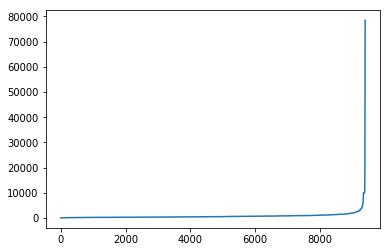

In [271]:
listings.price.sort_values().reset_index(drop=True).plot()

In [272]:
listings = listings[listings.price < 4000]

In [273]:
listings.shape

(9286, 20)

In [277]:
listings = listings[~(((listings['room_type'] == 'Private room') | (listings['room_type'] == 'Shared room')) 
                  & (listings['price'] > 2000))]

In [278]:
listings.shape

(9226, 20)

We ended up removing 178 listings from the original dataset.

### Property Type Column

As seen below, the most widely property type is 'Apartment', followed by a great distance by 'Condominium'.

Let's just keep the first 4 mostely used property types.

In [279]:
listings.groupby('property_type').id.count().sort_values(ascending=False)

property_type
Apartment                 6574
Condominium                500
Hostel                     387
House                      374
Guesthouse                 272
Serviced apartment         208
Hotel                      171
Bed and breakfast          147
Guest suite                135
Loft                       127
Other                       67
Boutique hotel              64
Aparthotel                  59
Bungalow                    38
Townhouse                   31
Tent                         8
Minsu (Taiwan)               7
Villa                        6
Cottage                      6
Cabin                        5
Tiny house                   4
Boat                         4
Nature lodge                 3
Tipi                         3
Casa particular (Cuba)       2
Chalet                       2
Dome house                   2
Hut                          2
Houseboat                    2
Farm stay                    2
Barn                         2
Pension (South Korea)    

In [280]:
def clean_property_type(property):
    if property not in ['Apartment', 'Condominium', 'Hostel', 'House']:
        return 'Other'
    return property

listings.property_type = listings.property_type.apply(clean_property_type)

In [281]:
listings.property_type.unique()

array(['Apartment', 'Other', 'Condominium', 'Hostel', 'House'],
      dtype=object)

### Bed Type Column

There's many bed types described on the listings, 'Real Bed' representing the big majority. So the remaining bed types will by changed to 'Other'.

In [282]:
listings.groupby('bed_type').id.count().sort_values(ascending=False)

bed_type
Real Bed         9130
Pull-out Sofa      47
Futon              23
Couch              15
Airbed             11
Name: id, dtype: int64

In [283]:
def clean_bed_type(property):
    if property not in ['Real Bed']:
        return 'Other'
    return property

listings.bed_type = listings.bed_type.apply(clean_bed_type)

In [284]:
listings.bed_type.unique()

array(['Real Bed', 'Other'], dtype=object)

### Amenities Column

For the amenities column we can create a new column with the total number of amenities for each listing.

In [285]:
listings['amenities_length'] = listings['amenities'].apply(lambda x: len(x.split(',')))

In [286]:
listings = listings.drop('amenities', axis=1)

### Handling Missing Values

In [287]:
listings.isnull().sum(axis=0)

id                           0
name                         9
listing_url                  0
price                        0
host_id                      0
neighbourhood_cleansed       0
latitude                     0
longitude                    0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    4
bedrooms                     3
beds                         6
bed_type                     0
number_of_reviews            0
review_scores_rating      2262
review_scores_location    2272
reviews_per_month         2090
amenities_length             0
dtype: int64

The 'name' column is not truly important here, it was just added so we could have a deeper understaing of the listings at hand. Hence this column will be removed after the cleaning process is over.

The columns entitles 'bathrooms', 'bedrooms' and 'beds' have a very small percentage of null values. In this case instead of removing these rows, we will apply the ffill method.

In [288]:
listings.bathrooms.fillna(method='ffill', inplace=True)
listings.bedrooms.fillna(method='ffill', inplace=True)
listings.beds.fillna(method='ffill', inplace=True)

The 3 last columns appear to have a big percentage of NaN values, this is because they most likely represent listings that had no reviews at the time the data was scraped. For now let's just replace the NaN with '0'.

In [289]:
listings = listings.fillna(0)

In [290]:
listings.isnull().sum(axis=0)

id                        0
name                      0
listing_url               0
price                     0
host_id                   0
neighbourhood_cleansed    0
latitude                  0
longitude                 0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
bed_type                  0
number_of_reviews         0
review_scores_rating      0
review_scores_location    0
reviews_per_month         0
amenities_length          0
dtype: int64

Now our the dataset has no NaN values.

In [291]:
listings.head()

,id,name,listing_url,price,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,number_of_reviews,review_scores_rating,review_scores_location,reviews_per_month,amenities_length
0,69074,Beautiful oasis of plants & art and best location,https://www.airbnb.com/rooms/69074,1413,160139,Central & Western,22.283516,114.150177,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,103,97.0,10.0,1.14,27
1,101765,Lamma Island flat 2min walk from the beach!,https://www.airbnb.com/rooms/101765,432,532909,Islands,22.200224,114.134609,Other,Entire home/apt,1,1.0,1.0,1.0,Real Bed,2,80.0,8.0,0.63,33
2,103760,Central Centre 5 min walk to/from Central MTR,https://www.airbnb.com/rooms/103760,855,304876,Central & Western,22.284074,114.155696,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,229,88.0,9.0,2.66,11
3,132773,Fabulous 2 Bdrm Aprt Open kitchen,https://www.airbnb.com/rooms/132773,1060,304876,Central & Western,22.288679,114.144944,Apartment,Entire home/apt,6,1.0,2.0,2.0,Real Bed,153,88.0,8.0,1.80,13
4,133390,"Soho, Hong Kong 1 bedroom flat",https://www.airbnb.com/rooms/133390,942,654642,Central & Western,22.283435,114.155392,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,27,97.0,10.0,0.32,11


### Finally, let's drop informative columns

The columns 'id', 'name', 'listing_url' don't provide any important knowledge worth saving for Data Visualization and/or Modelling. Hence, let's drop these columns.

In [292]:
listings = listings.drop(['id', 'name', 'listing_url'], axis=1)

In [293]:
listings.shape

(9226, 17)

In [294]:
listings.head()

,price,host_id,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,number_of_reviews,review_scores_rating,review_scores_location,reviews_per_month,amenities_length
0,1413,160139,Central & Western,22.283516,114.150177,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,103,97.0,10.0,1.14,27
1,432,532909,Islands,22.200224,114.134609,Other,Entire home/apt,1,1.0,1.0,1.0,Real Bed,2,80.0,8.0,0.63,33
2,855,304876,Central & Western,22.284074,114.155696,Apartment,Entire home/apt,6,1.0,2.0,3.0,Real Bed,229,88.0,9.0,2.66,11
3,1060,304876,Central & Western,22.288679,114.144944,Apartment,Entire home/apt,6,1.0,2.0,2.0,Real Bed,153,88.0,8.0,1.80,13
4,942,654642,Central & Western,22.283435,114.155392,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,27,97.0,10.0,0.32,11


### Save the cleansed dataset

In [295]:
listings.to_csv('data/listings_cleansed.csv')